<a href="https://colab.research.google.com/github/samuelrodriguesi/topicos_especiais_4/blob/main/teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

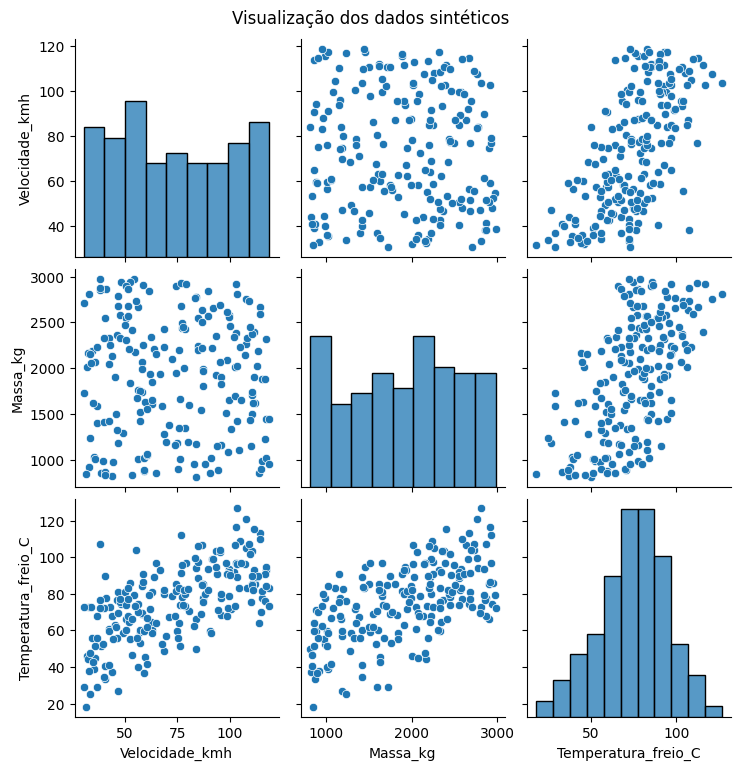

In [14]:
# 2. Geração de dados sintéticos
np.random.seed(42)
n = 200

velocidade = np.random.uniform(30, 120, n)      # km/h
massa = np.random.uniform(800, 3000, n)         # kg
temperatura = 0.5 * velocidade + 0.02 * massa + np.random.normal(0, 10, n)

df = pd.DataFrame({
    'Velocidade_kmh': velocidade,
    'Massa_kg': massa,
    'Temperatura_freio_C': temperatura
})

# Visualização dos dados
sns.pairplot(df)
plt.suptitle("Visualização dos dados sintéticos", y=1.02)
plt.show()

In [6]:
# 3. Divisão dos dados: treino e teste
X = df[['Velocidade_kmh', 'Massa_kg']]
y = df['Temperatura_freio_C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 4. Treinamento do modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Métricas no conjunto de teste:
R²: 0.66
RMSE: 12.16
MAE: 9.89


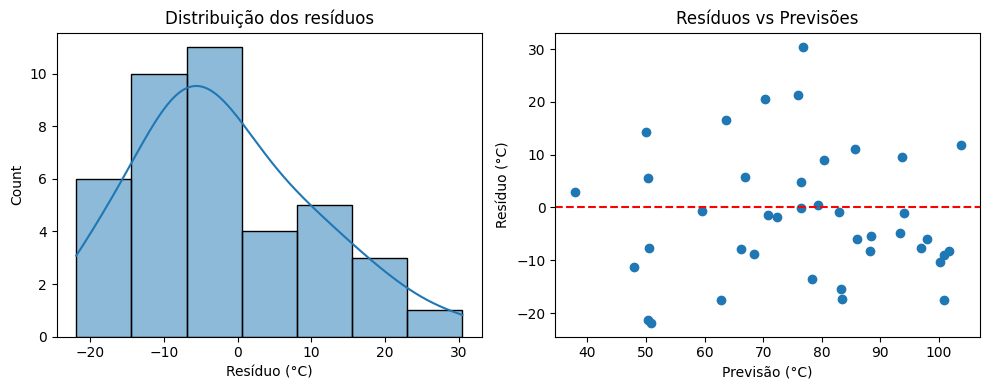

In [8]:
# 5. Avaliação no conjunto de teste
y_pred = modelo.predict(X_test)

print("Métricas no conjunto de teste:")
print("R²: {:.2f}".format(r2_score(y_test, y_pred)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred)))

# Análise dos resíduos
residuos = y_test - y_pred

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos resíduos")
plt.xlabel("Resíduo (°C)")

plt.subplot(1,2,2)
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Previsões")
plt.xlabel("Previsão (°C)")
plt.ylabel("Resíduo (°C)")
plt.tight_layout()
plt.show()

In [9]:
# 6. Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
modelo_cv = LinearRegression()

scores_r2 = cross_val_score(modelo_cv, X_train, y_train, cv=kfold, scoring='r2')
scores_mse = cross_val_score(modelo_cv, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
scores_mae = cross_val_score(modelo_cv, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')

print("\nValidação Cruzada (5-fold):")
print("R² médio: {:.2f}".format(np.mean(scores_r2)))
print("RMSE médio: {:.2f}".format(np.sqrt(-np.mean(scores_mse))))
print("MAE médio: {:.2f}".format(-np.mean(scores_mae)))


Validação Cruzada (5-fold):
R² médio: 0.76
RMSE médio: 9.43
MAE médio: 7.60


In [10]:
# 7. Análise dos resultados
print("\nAnálise comparativa:")
print("- R² (teste): {:.2f} | R² (CV): {:.2f}".format(r2_score(y_test, y_pred), np.mean(scores_r2)))
print("- RMSE (teste): {:.2f} | RMSE (CV): {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(-np.mean(scores_mse))))
print("- MAE (teste): {:.2f} | MAE (CV): {:.2f}".format(mean_absolute_error(y_test, y_pred), -np.mean(scores_mae)))

# Verificação de viés ou variância
print("\nDiagnóstico:")
print("Se os resultados do teste forem similares aos da validação cruzada, o modelo está generalizando bem.")
print("Se o desempenho no treino for muito melhor que na validação/teste, pode haver sobreajuste (alta variância).")
print("Se os dois forem ruins, pode haver subajuste (alto viés).")


Análise comparativa:
- R² (teste): 0.66 | R² (CV): 0.76
- RMSE (teste): 12.16 | RMSE (CV): 9.43
- MAE (teste): 9.89 | MAE (CV): 7.60

Diagnóstico:
Se os resultados do teste forem similares aos da validação cruzada, o modelo está generalizando bem.
Se o desempenho no treino for muito melhor que na validação/teste, pode haver sobreajuste (alta variância).
Se os dois forem ruins, pode haver subajuste (alto viés).


In [11]:
# 8. Conclusão
print("\nConclusão:")
print("O modelo de regressão linear foi capaz de prever com boa precisão a temperatura de freios com base na velocidade e na massa.")
print("A validação cruzada mostrou resultados consistentes com o conjunto de teste, indicando um bom equilíbrio entre viés e variância.")
print("Para melhorar o desempenho, pode-se incluir mais variáveis relevantes (ex: tipo de pastilha de freio, inclinação da pista) ou testar modelos não lineares.")


Conclusão:
O modelo de regressão linear foi capaz de prever com boa precisão a temperatura de freios com base na velocidade e na massa.
A validação cruzada mostrou resultados consistentes com o conjunto de teste, indicando um bom equilíbrio entre viés e variância.
Para melhorar o desempenho, pode-se incluir mais variáveis relevantes (ex: tipo de pastilha de freio, inclinação da pista) ou testar modelos não lineares.
